<b><center>CO2_Emmissions_Canada

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [11]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
pd.set_option('display.max_rows',None)

In [4]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
df.duplicated().sum()

1103

In [9]:
df.shape

(7385, 12)

Dropping 1103 Duplicates

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(6282, 12)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [19]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

Dropping those columns which arent helping the Numerical Modelling for now, All the STR Rows

In [29]:
df=df.drop(['Make','Model','Vehicle Class','Transmission','Fuel Type'],axis=1)

In [31]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


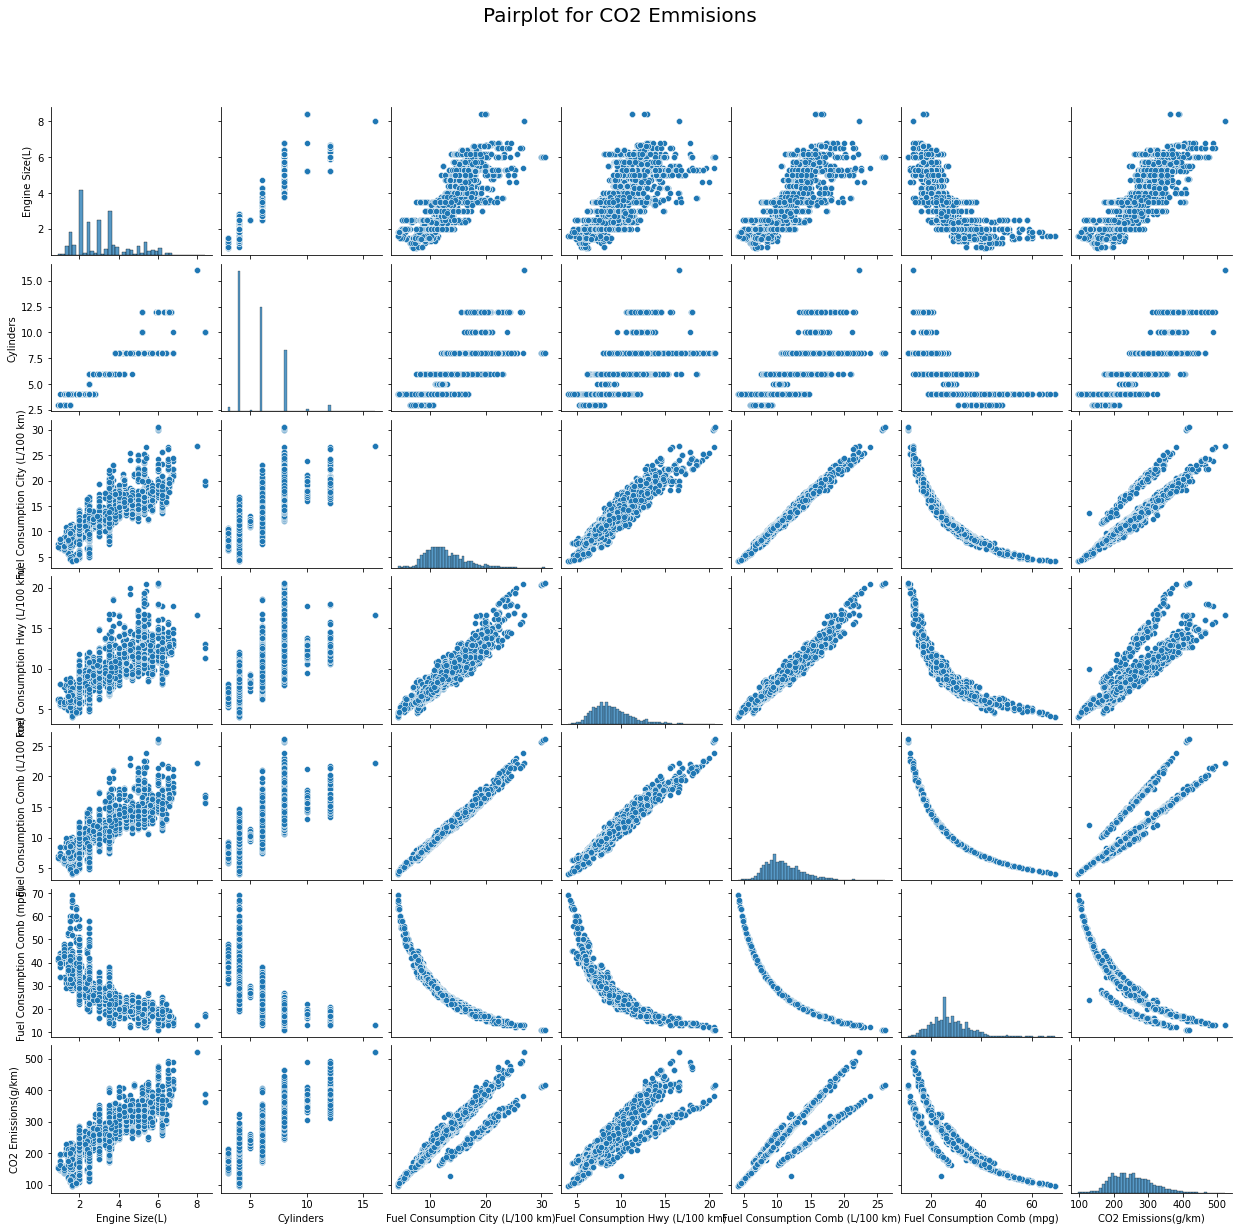

In [34]:
co2_pp = sns.pairplot(df)
co2_pp.fig.suptitle('Pairplot for CO2 Emmisions', fontsize=20)
co2_pp.fig.subplots_adjust(top=0.9)

<AxesSubplot:>

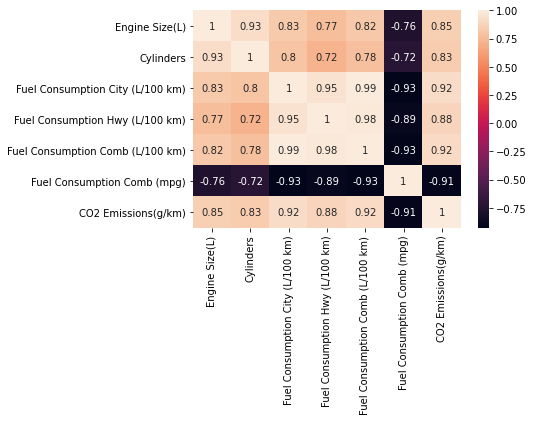

In [35]:
sns.heatmap(df.corr(),annot=True)

It is evident from the Heatmap and Scatter Plot that Fuel Consumption Comustion (mpg) is Non correlated to CO2 Emissions

<b>Include the individual Testing of each Plot vs Co2 emissions

In [37]:
df.dtypes

Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

<b>Corelation between Engine Size vs CO2 Emmisions

In [41]:
engine_df=df[['Engine Size(L)','CO2 Emissions(g/km)']]

In [42]:
engine_df.corr()

,Engine Size(L),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.854802
CO2 Emissions(g/km),0.854802,1.000000


In [53]:
R = np.round(engine_df.corr().iloc[1,0],3)
print('Corelation Coefficient', R)

R2 = np.round(R**2,3)
print('Coefficient of Determination', R2)

Corelation Coefficient 0.855
Coefficient of Determination 0.731


This tells that 71% variance can be found out with Engine Size

Text(0.5, 1.0, 'Corelation between CO2 Emmisions vs Engine Size(L)')

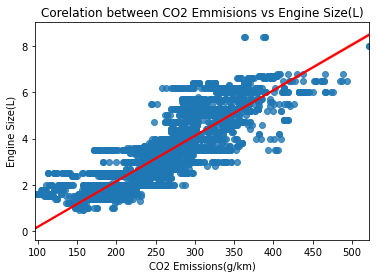

In [71]:
engine_fig = sns.regplot(data=engine_df,x='CO2 Emissions(g/km)', y='Engine Size(L)',line_kws={'color':'red'})
engine_fig.set_title('Corelation between CO2 Emmisions vs Engine Size(L)')

<b>Correlation between Cylinders and CO2 Emmisions

In [61]:
cyl_df=df[['Cylinders','CO2 Emissions(g/km)']]

In [62]:
R = np.round(cyl_df.corr().iloc[1,0],3)
print('Corelation Coefficient', R)

R2 = np.round(R**2,3)
print('Coefficient of Determination', R2)

Corelation Coefficient 0.835
Coefficient of Determination 0.697


There is 69 % Variation with Cylinder and CO2 Emmisions

Text(0.5, 1.0, 'Corelation between CO2 Emmisions vs Cylinders')

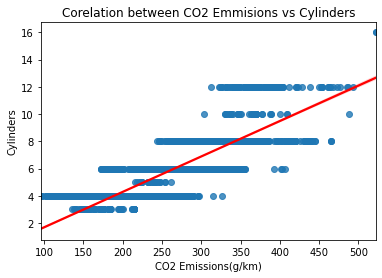

In [72]:
cyl_fig = sns.regplot(data=cyl_df,x='CO2 Emissions(g/km)', y='Cylinders',line_kws={'color':'red'})
cyl_fig.set_title('Corelation between CO2 Emmisions vs Cylinders')

<b>Correlation between Fuel Consumption City (L/100 km) and CO2 Emmisions

In [65]:
fuelcity_df=df[['Fuel Consumption City (L/100 km)','CO2 Emissions(g/km)']]

In [66]:
R = np.round(fuelcity_df.corr().iloc[1,0],3)
print('Corelation Coefficient', R)

R2 = np.round(R**2,3)
print('Coefficient of Determination', R2)

Corelation Coefficient 0.919
Coefficient of Determination 0.845


Text(0.5, 1.0, 'Corelation between CO2 Emmisions vs Fuel Consumption City (L/100 km)')

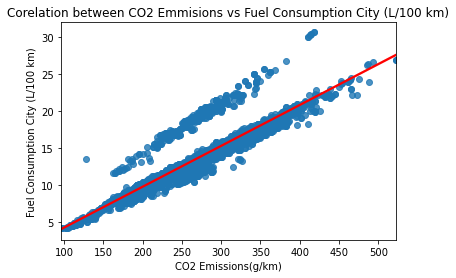

In [73]:
fuelcity_fig = sns.regplot(data=fuelcity_df,x='CO2 Emissions(g/km)', y='Fuel Consumption City (L/100 km)',
                           line_kws={'color':'red'})

fuelcity_fig.set_title('Corelation between CO2 Emmisions vs Fuel Consumption City (L/100 km)')

<b>Correlation between Fuel Consumption Hwy (L/100 km) and CO2 Emmisions

In [68]:
fuelhwy_df=df[['Fuel Consumption Hwy (L/100 km)','CO2 Emissions(g/km)']]

In [69]:
R = np.round(fuelhwy_df.corr().iloc[1,0],3)
print('Corelation Coefficient', R)

R2 = np.round(R**2,3)
print('Coefficient of Determination', R2)

Corelation Coefficient 0.883
Coefficient of Determination 0.78


Text(0.5, 1.0, 'Corelation between CO2 Emmisions vs Fuel Consumption Hwy (L/100 km)')

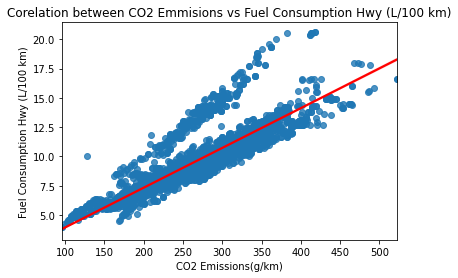

In [74]:
fuelhwy_fig = sns.regplot(data=fuelhwy_df,x='CO2 Emissions(g/km)', y='Fuel Consumption Hwy (L/100 km)',
                          line_kws={'color':'red'})
fuelhwy_fig.set_title('Corelation between CO2 Emmisions vs Fuel Consumption Hwy (L/100 km)')